# Import Libraries

In [ ]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import kagglehub

import matplotlib.pyplot as plt

/Users/anabellafalk/cs4701/cs4701-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [2]:
# Download latest version of data
path = kagglehub.dataset_download("lexset/synthetic-asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /Users/anabellafalk/.cache/kagglehub/datasets/lexset/synthetic-asl-alphabet/versions/3


In [ ]:
# Initialize transformation: format as tensor, normalize
transform_tr = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5] 
        )
    ])

In [ ]:
# Load data folder
dat_tr = torchvision.datasets.ImageFolder(
    root = path + "/Train_Alphabet",
    transform = transform_tr)

In [ ]:
BATCH_SIZE = 64

# Load image data from folder
loader_tr = DataLoader(
    dat_tr, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, pin_memory=True
)

In [ ]:
# Iterate through image data
image, labels = next(iter(loader_tr))

# device = 'cpu'
# count = 0
# for i, data in enumerate(loader_tr):
#     count += 1
#     image, labels = data
#     image = image.to(device)
#     labels = labels.to(device)

In [ ]:
# size of batch, 3 (RGB), 512, 513 (pixel dims, should be 512x512?)
image.shape

torch.Size([64, 3, 512, 513])

View Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..0.7176471].


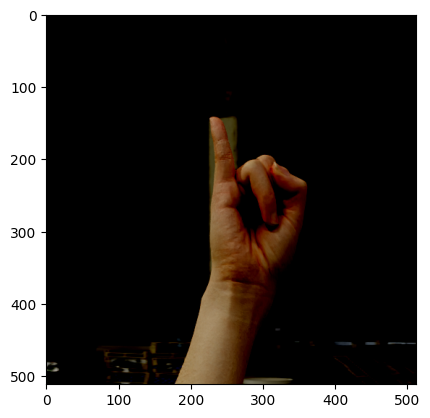

Label: 9


In [86]:
# Present image
i = 32
img = image[i].squeeze()
img = img.permute(1, 2, 0)  
label = labels[i]

plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [ ]:
# Label mapping
print(dat_tr.class_to_idx)

{'A': 0, 'B': 1, 'Blank': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
